In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

# Measurment Uncertainty

In this tutorial, we will look at how to deal with measurement uncertainty in data analysis. To this end we are using a new library called `sklearn` (actually called [scikit-learn](https://scikit-learn.org/)). This is a quite powerful machine learning package that can do much more than linear regression. Herein we will only take advantage of the fact that it allows us to weight samples in the least-squares loss function.

We begin by importing a new dataset:

In [5]:
time, yield1, yield2, yield3, yield4, yield5 = np.loadtxt('data_5.csv',skiprows=1,delimiter=',',unpack=True)

yields = np.array([yield1, yield2, yield3, yield4, yield5])

This contains five different measurements of yield against time. For convenience I packed them all into a single numpy array. If we plot these, we observe quite some scatter.

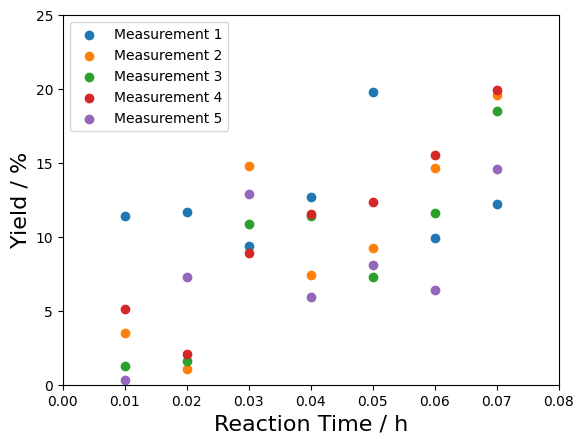

In [43]:
for i in range(5):   
    plt.scatter(time,yields[i,:],label=f"Measurement {i+1}")

plt.xlabel('Reaction Time / h',fontsize=16)
plt.ylabel('Yield / %',fontsize=16)

plt.legend()

plt.xlim([0,0.08])
plt.ylim([0,25])

plt.savefig('raw_data.png',bbox_inches='tight')

plt.show()

This is quite noisy data, but there seems to be some rough trend towards higher yields at higher reaction times. To see this more clearly, we can look at the mean:

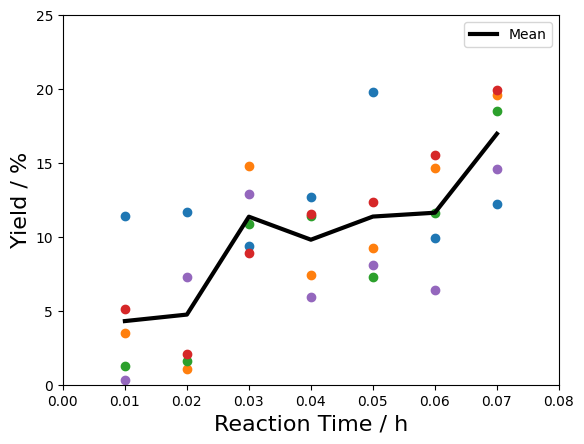

In [44]:
mean = np.mean(yields,axis=0)
plt.plot(time,mean,color='black',linewidth='3',label='Mean')
for i in range(5):   
    plt.scatter(time,yields[i,:])

plt.xlabel('Reaction Time / h',fontsize=16)
plt.ylabel('Yield / %',fontsize=16)

plt.legend()

plt.xlim([0,0.08])
plt.ylim([0,25])

plt.savefig('raw_data_mean.png',bbox_inches='tight')

plt.show()

Of course, we can also do linear regression on these mean values, in order to quantify the trend:

In [45]:
# Data preparation for sklearn
time_dat = np.array([[t,] for t in time])

# Fitting the model
lin_model = LinearRegression()
lin_model.fit(time_dat,mean)

# Predicting the values of the regression line
pred_yield_ols = lin_model.predict(time_dat)

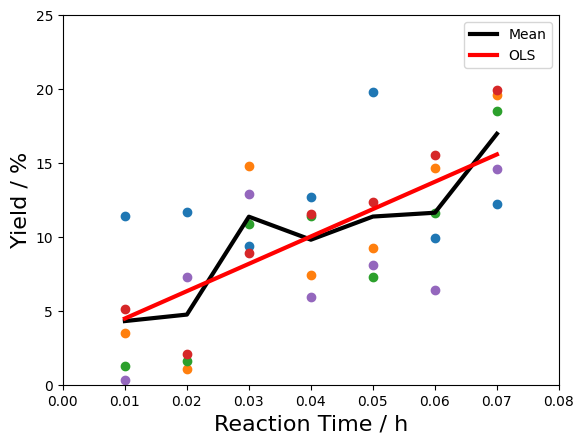

In [46]:
plt.plot(time,mean,color='black',linewidth=3,label='Mean')
plt.plot(time,pred_yield_ols,color='red',linewidth=3,label='OLS')

for i in range(5):   
    plt.scatter(time,yields[i,:])

plt.xlabel('Reaction Time / h',fontsize=16)
plt.ylabel('Yield / %',fontsize=16)

plt.legend()

plt.xlim([0,0.08])
plt.ylim([0,25])

plt.savefig('raw_data_mean_ols.png',bbox_inches='tight')

plt.show()

Here, OLS stands for *ordinary least squares*, which is a common term for linear regression with the 'normal' least-squares loss function. Now, let's go beyond the means and look at the standard deviations of the data:

[3.93184305 4.1368631  2.21429138 2.61394234 4.54837591 3.30025274
 3.03750317]


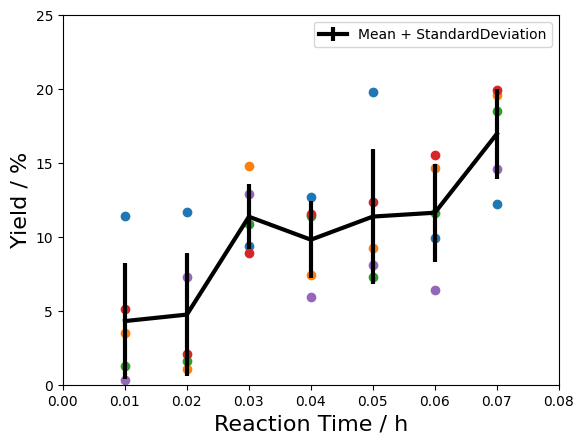

In [48]:
std = np.std(yields,axis=0)
print(std)

plt.errorbar(time,mean,yerr=std,color='black',linewidth=3,label='Mean + StandardDeviation')

#plt.plot(time,pred_yield_ols,color='red',linewidth=3,label='OLS')

for i in range(5):   
    plt.scatter(time,yields[i,:])

plt.xlabel('Reaction Time / h',fontsize=16)
plt.ylabel('Yield / %',fontsize=16)

plt.legend()

plt.xlim([0,0.08])
plt.ylim([0,25])

plt.savefig('raw_data_mean_std.png',bbox_inches='tight')

plt.show()

This reveals that not all standard deviations are equally large. As it turns out, we can actually take this into account by doing a *weighted least squares* (WLS) regression, instead of an ordinary one. To this end, we just slightly modify the sum-of-squares formula. Remember that so far we've been using a formula that looks like this:

$$
\mathcal{L}(m,b) = \sum_i^{N_\mathrm{data}} \left[ y_i^\mathrm{ref} - (m \cdot x + b)  \right]^2
$$

In WLS we use:

$$
\mathcal{L}(m,b) = \sum_i^{N_\mathrm{data}} w_i \left[ y_i^\mathrm{ref} - (m \cdot x + b)  \right]^2
$$

The only differences is the introduction of the weights $w_i$. We usually define these to be the inverse of the standard deviation: 

$$
w_i = \frac{1}{\sigma_i}
$$

This way, datapoints with a large standard deviation contribute less to the sum-of-squares. This has consequences for the regression line we end up with:

In [49]:
# Calculate the weights
weights = 1./std

# Fitting the model with weights
lin_model = LinearRegression()
lin_model.fit(time_dat,mean,sample_weight=weights)

# Predicting the values of the regression line
pred_yield_wls = lin_model.predict(time_dat)

[3.93184305 4.1368631  2.21429138 2.61394234 4.54837591 3.30025274
 3.03750317]


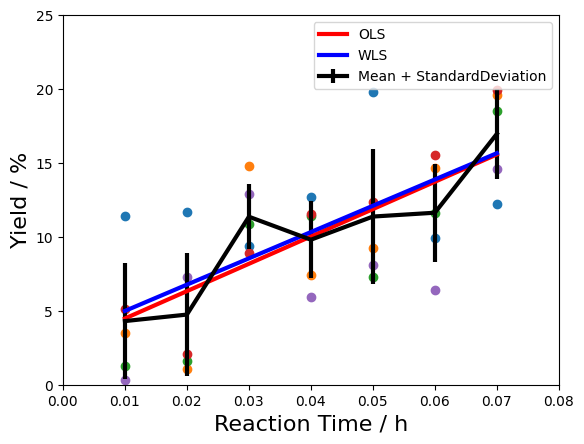

In [50]:
std = np.std(yields,axis=0)
print(std)

plt.errorbar(time,mean,yerr=std,color='black',linewidth=3,label='Mean + StandardDeviation')

plt.plot(time,pred_yield_ols,color='red',linewidth=3,label='OLS')
plt.plot(time,pred_yield_wls,color='blue',linewidth=3,label='WLS')

for i in range(5):   
    plt.scatter(time,yields[i,:])

plt.xlabel('Reaction Time / h',fontsize=16)
plt.ylabel('Yield / %',fontsize=16)

plt.legend()

plt.xlim([0,0.08])
plt.ylim([0,25])

plt.savefig('raw_data_ols_wls.png',bbox_inches='tight')

plt.show()

Actually, the differences between the two lines are quite small in this case, due to the fact that the standard deviations of the datapoints are fairly similar. So let's look at another example, where that's not the case:

In [51]:
time, mean, std = np.loadtxt('data_6.csv',skiprows=1,delimiter=',',unpack=True)

Here means and standard deviations are already computed, so we can directly move to fitting and plotting:

In [52]:
# Calculate the weights
weights = 1./std

# Fitting the model with weights
lin_model = LinearRegression()
lin_model.fit(time_dat,mean,sample_weight=weights)

# Predicting the values of the WLS regression line
pred_yield_wls = lin_model.predict(time_dat)

# Fitting the OLS model without weights
lin_model = LinearRegression()
lin_model.fit(time_dat,mean)

# Predicting the values of the OLS regression line
pred_yield_ols = lin_model.predict(time_dat)

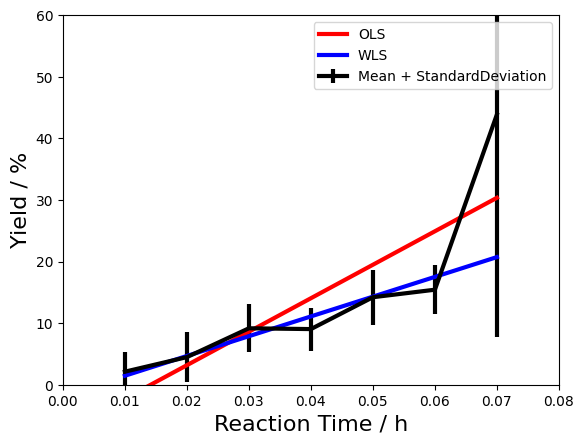

In [53]:
plt.errorbar(time,mean,yerr=std,color='black',linewidth=3,label='Mean + StandardDeviation')

plt.plot(time,pred_yield_ols,color='red',linewidth=3,label='OLS')
plt.plot(time,pred_yield_wls,color='blue',linewidth=3,label='WLS')

plt.xlabel('Reaction Time / h',fontsize=16)
plt.ylabel('Yield / %',fontsize=16)

plt.legend()

plt.xlim([0,0.08])
plt.ylim([0,60])

plt.savefig('ols_wls.png',bbox_inches='tight')

plt.show()